In [1]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dataset_path = './dataset/'
train_path = './images/train/'
test_path = './images/test/'
augmented_path = './images/augmented/'
WIDTH = 76
HEIGHT = 76
NO_CLASSES = 11

#### Divide images for training and testing

In [ ]:
# for folder in os.listdir(dataset_path):
#     folder_path = os.path.join(dataset_path, folder)
#     folder_train_path = os.path.join(train_path, folder)
#     folder_test_path = os.path.join(test_path, folder)

#     folder_images_count = len(os.listdir(folder_path))
    
#     if folder not in os.listdir(train_path):
#         os.mkdir(folder_train_path)
#     if folder not in os.listdir(test_path):
#         os.mkdir(folder_test_path)

#     image_counter = 0
#     train_threshold = folder_images_count * 0.8
#     image_path = ''

#     for image in os.listdir(folder_path):
#         image_path = os.path.join(folder_path, image)
#         resized_image = cv2.imread(image_path)

#         if isinstance(resized_image, type(None)):
#             continue

#         resized_image = cv2.resize(resized_image, (WIDTH, HEIGHT))

#         if image_counter <= train_threshold:
#             cv2.imwrite(os.path.join(folder_train_path, image), resized_image)
#             # shutil.copyfile(image_path, os.path.join(folder_train_path, image))
#         else: 
#             cv2.imwrite(os.path.join(folder_test_path, image), resized_image)
#             # shutil.copyfile(image_path, os.path.join(folder_test_path, image))
#         image_counter += 1


#### Data Augmentation

In [3]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.3,
							zoom_range = 0.3,
							horizontal_flip = True,)
							

Found 5495 images belonging to 11 classes.
[ 0  0  0 ... 10 10 10]


<Figure size 432x288 with 0 Axes>

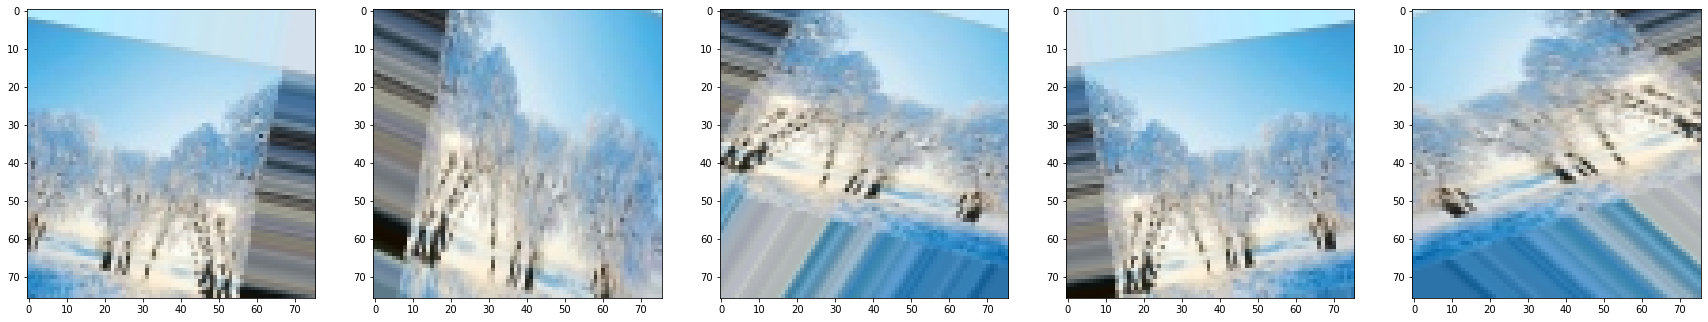

In [4]:
train_generator = train_datagen.flow_from_directory(
							train_path,
							target_size = (WIDTH, HEIGHT),
							batch_size = 8,
							class_mode ='categorical',)

print(train_generator.classes)

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8)) 

for i in range(5):
	axarr[i].imshow(train_generator[0][0][0])

Found 5495 images belonging to 11 classes.
(8, 76, 76, 3)
{'dew': 0, 'fogsmog': 1, 'frost': 2, 'glaze': 3, 'hail': 4, 'lightning': 5, 'rain': 6, 'rainbow': 7, 'rime': 8, 'sandstorm': 9, 'snow': 10}
5495


<Figure size 432x288 with 0 Axes>

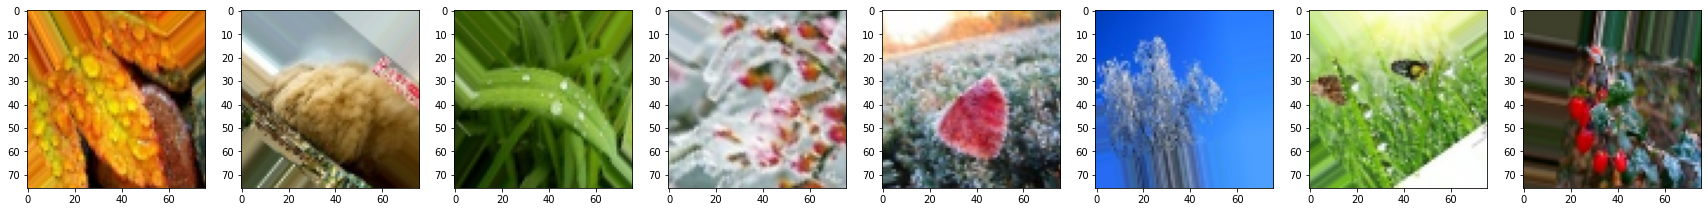

In [5]:
train_generator = train_datagen.flow_from_directory(
							train_path,
							target_size = (WIDTH, HEIGHT),
							batch_size = 8,
							class_mode ='categorical')

images , labels = train_generator[0]

print(images.shape)
print(train_generator.class_indices)
# Got the same amount of classes of the images. Each class has an ID mapped to the value of the class (dew, fogsmog, ..., snow)
print(len(train_generator.classes))

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]):  
	axarr[i].imshow(images[i])

In [ ]:
# Won't save augmented images
train_generator = train_datagen.flow_from_directory(
							train_path,
							target_size = (WIDTH, HEIGHT),
							batch_size = 8,
							class_mode ='categorical',
							save_to_dir= augmented_path,   
                            save_prefix='aug',
                            save_format='png'
							)

#### Convolutional Neural Network

In [6]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(5, (3, 3), activation="relu", input_shape = (WIDTH,HEIGHT,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(11, activation='sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer='Adam',
						metrics=['acc'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 74, 74, 5)         140       
_________________________________________________________________
flatten (Flatten)            (None, 27380)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3504768   
_________________________________________________________________
dense_1 (Dense)              (None, 11)                1419      
Total params: 3,506,327
Trainable params: 3,506,327
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
687/687 [==============================] - 32s 45ms/step - loss: 1.9712 - acc: 0.3675
Epoch 2/15
687/687 [==============================] - 35s 51ms/step - loss: 1.5216 - acc: 0.5084 0s - loss: 1.5216 - acc: 0.50
Epoch 3/15
687/687 [==============================] - 35s 51ms/step - loss: 1.4412 - acc: 0.5150: 1s - loss: 1
Epoch 4/15
687/687 [==============================] - 31s 45ms/step - loss: 1.3915 - acc: 0.5225
Epoch 5/15
687/687 [==============================] - 31s 45ms/step - loss: 1.3756 - acc: 0.5358
Epoch 6/15
687/687 [==============================] - 32s 46ms/step - loss: 1.3582 - acc: 0.5460
Epoch 7/15
687/687 [==============================] - 32s 47ms/step - loss: 1.3368 - acc: 0.5569
Epoch 8/15
687/687 [==============================] - 32s 46ms/step - loss: 1.2612 - acc: 0.5720
Epoch 9/15
687/687 [==============================] - 40s 58ms/step - loss: 1.2950 - acc: 0.5579
Epoch 10/15
687/687 [==============================] - 35s 51ms/step - loss: 1.2084

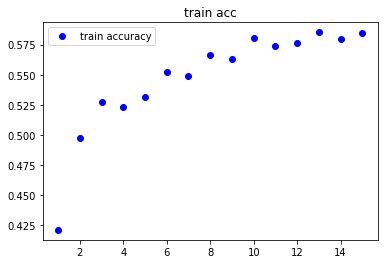

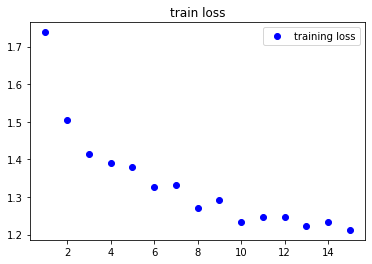

In [7]:
history = model.fit(train_generator, 
					epochs = 15)

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [ ]:
print('There were ' + str(len(os.listdir(augmented_path))) + ' augmented images generated.')

Rafael Hinojosa López

A01705777

19 de mayo del 2023

TC2003B Actividad 2.2 Preprocesado de los datos